In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

from stop_permuting_features.src.utils import get_lr

In [2]:
data_path = "../data/experiment_results.csv"
data = pd.read_csv(data_path)

In [3]:
data.shape

(110, 14)

In [4]:
data.head()

,corr_data_correlation_min,corr_data_correlation_max,corr_data_correlation_median,corr_data_correlation_mean,corr_data_correlation_std,corr_data_abs_correlation_min,corr_data_abs_correlation_max,corr_data_abs_correlation_median,corr_data_abs_correlation_mean,corr_data_abs_correlation_std,model_roc_auc,permutation_ranks_corr,shap_ranks_corr,gain_ranks_corr
0,0.712818,0.989478,0.938596,0.922759,0.051869,0.712818,0.989478,0.938596,0.922759,0.051869,0.910604,0.021176,0.044013,0.047456
1,0.677959,0.990332,0.932872,0.910196,0.069046,0.677959,0.990332,0.932872,0.910196,0.069046,0.937487,0.359040,0.524972,0.520060
2,0.757279,0.989839,0.936031,0.923763,0.049844,0.757279,0.989839,0.936031,0.923763,0.049844,0.930651,0.545354,0.523513,0.502752
3,0.681658,0.989617,0.932819,0.917148,0.059209,0.681658,0.989617,0.932819,0.917148,0.059209,0.927040,0.171188,0.357120,0.341819
4,0.711070,0.990207,0.952358,0.933501,0.053982,0.711070,0.990207,0.952358,0.933501,0.053982,0.920012,0.185882,0.242121,0.255787


R2 score permutation_ranks_corr: 0.4116
R2 score shap_ranks_corr: 0.4009
R2 score gain_ranks_corr: 0.4003


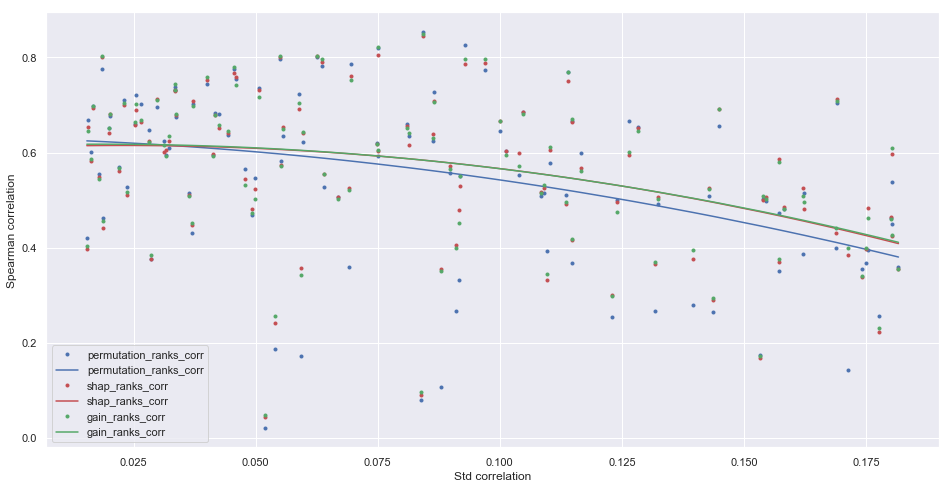

In [5]:
x_label = "corr_data_abs_correlation_std"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Std correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score permutation_ranks_corr: 0.7217
R2 score shap_ranks_corr: 0.6508
R2 score gain_ranks_corr: 0.6598


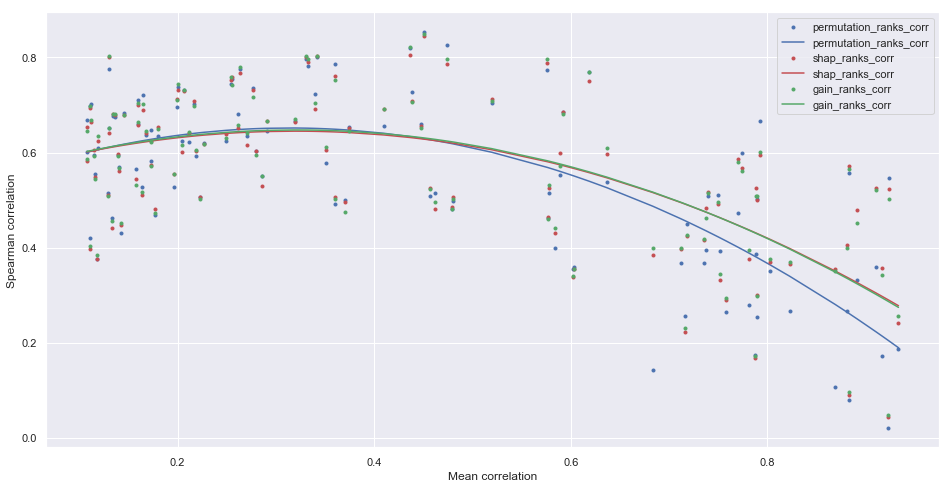

In [6]:
x_label = "corr_data_abs_correlation_mean"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Mean correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.6680
R2 score : 0.6308
R2 score : 0.6347


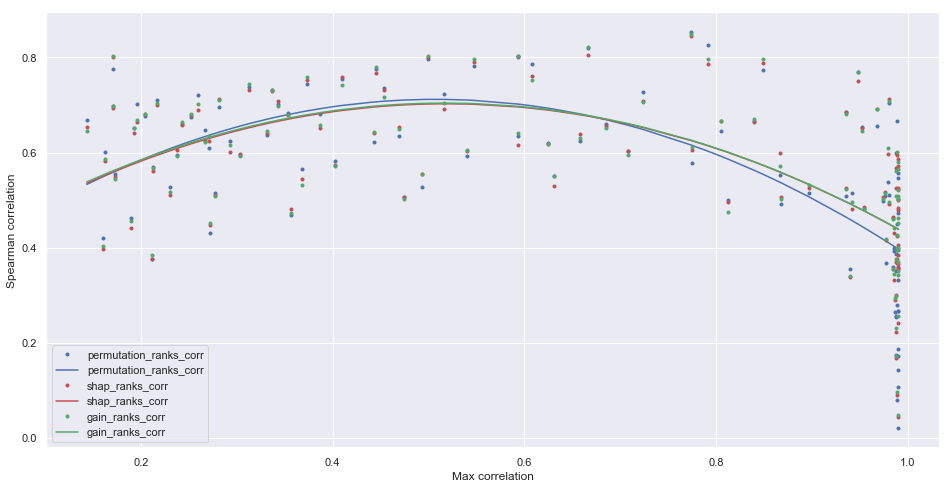

In [7]:
x_label = "corr_data_abs_correlation_max"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Max correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.3331
R2 score : 0.2154
R2 score : 0.2346


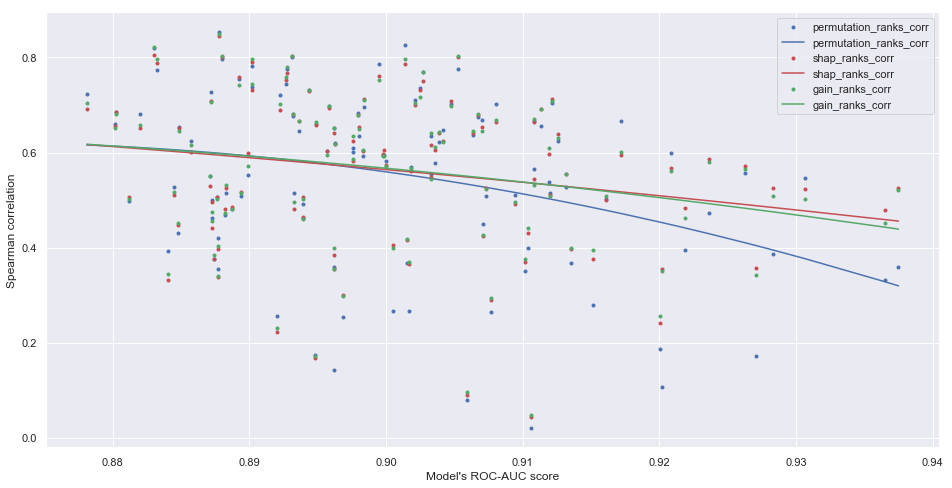

In [8]:
x_label = "model_roc_auc"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.5528


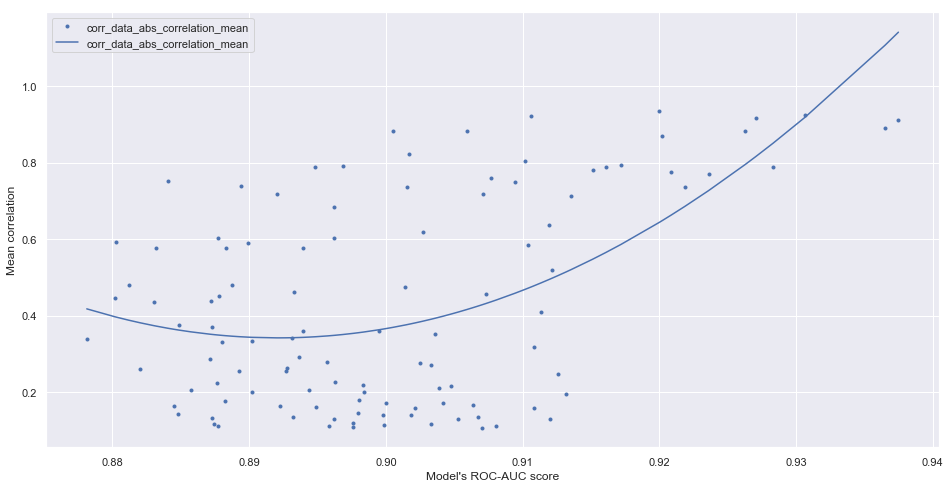

In [12]:
x_label = "model_roc_auc"
y_labels = ["corr_data_abs_correlation_mean"]
y_labels_legend = ["corr_data_abs_correlation_mean"]
degrees = [2]
y_colors = ["b"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score")
plt.ylabel("Mean correlation")
plt.legend()
plt.show()